# **Homework 1:** 
STATS348, UChicago, Spring 2024

----------------
**Your name here:**
Alex Huang

----------------

<a href="https://colab.research.google.com/github/aschein/stat_348_2024/blob/main/assignments/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

## Instructions

The purpose of this homework is to apply the concepts raised in week 1 on supervised learning and decision problems:

* overfitting / underfitting
* CV and model selection
* logistic regression
* KNNs

This homework will also get you familiar with Python and the [scikit-learn](https://scikit-learn.org/stable/) package.

For reference, this homework is a close adaption of [homework 1 from the 2021 version of STAT348](https://dynalist.io/d/ehiGZbaDzYG4q9tJvuCrag3U#z=Hu-cB8VnWnu5IXOgZ-3MaF6C&q=%23homework%20).

Assignment is due **Saturday March 30, 11:59pm** on GradeScope.


## **Problem 1:** Elephants

Read through [Matthew Stephens' vignette on classifying savannah versus forest elephants](https://stephens999.github.io/fiveMinuteStats/likelihood_ratio_simple_models.html) and then do exercises 2a and 2b from the vignette, which are copied here (and relabeled 1a and 1b).

> 1a) Perform the following simulation study. Simulate 1000 tusks (values of $x$) from each of the models $M_S$ and $M_F$. For each simulated tusk compute the LR for $M_S$ vs $M_F$, so you have computed 2000 LRs. Now consider using the LR to classify each tusk as being from a savanna or a forest elephant. Recall that large values for LR indicate support for $M_S$, so a natural classification rule is “classify as savanna if $\textrm{LR} > c$, otherwise classify as forest” for some threshold $c$. Plot the misclassification rate (= number of tusks wrongly classified/2000) for this rule, as $c$ ranges from 0.01 to 100. What value of $c$ minimizes the misclassification rate? [Hint: the plot will look best if you do things on the log scale, so you could let $\log_{10}(c)$ vary from -2 to 2 using an equally spaced grid, and plot the misclassification rate on the $y$-axis against $\log_{10}(c)$ on the $x$-axis.]


> 1b) Repeat the above simulation study using 100 tusks from MS and 1900 tusks from MF. What value of $c$ minimizes the misclassification rate? Comment.

To complete this problem in Python, here are some useful tools:
- To plot you can use [matplotlib](https://matplotlib.org/) and [seaborn](https://seaborn.pydata.org/). You can see the week 1 notebook for examples.

- To sample random variables you can use [numpy.random](https://numpy.org/doc/stable/reference/random/index.html)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as rn

# sample a Bernoulli with probability p
p = 0.5
x = rn.binomial(1, p)

# sample n Bernoullis iid with probability p
n = 100
x = rn.binomial(1, p, size=n)

# sample n Bernoullis independently with different probabilities
p = np.array([0.1, 0.4, 0.5, 0.1, 0.9])
x = rn.binomial(1, p)

# this last example uses broadcasting.
# See here: https://numpy.org/doc/stable/user/basics.broadcasting.html

ImportError: DLL load failed while importing _path: The specified module could not be found.

To complete the first part of this problem, you should complete the following functions.

In [ ]:
def simulate_tusks_forest(size=1000) -> pd.DataFrame:
    """Samples from the likelihood of P(x | forest).
    
    Parameters
    ----------
    size : int
        The number of samples to draw.
    """
    # Your code here
    FOREST_MARKER_PROB = [0.8, 0.2, 0.11, 0.17, 0.23, 0.25] 
    data = np.random.binomial(1, FOREST_MARKER_PROB, (size, len(FOREST_MARKER_PROB)))
    dataframe = pd.DataFrame(data, columns=[1,2,3,4,5,6])
    dataframe.columns.name = 'marker'
    return dataframe

def simulate_tusks_savannah(size=1000) -> pd.DataFrame:
    """Samples from the likelihood of P(x | savannah).
    
    Parameters
    ----------
    size : int
        The number of samples to draw.
    """
    # Your code here
    SAVANNAH_MARKER_PROB = [0.4, 0.12, 0.21, 0.12, 0.02, 0.32]
    data = np.random.binomial(1, SAVANNAH_MARKER_PROB, (size, len(SAVANNAH_MARKER_PROB)))
    dataframe = pd.DataFrame(data, columns=[1,2,3,4,5,6])
    dataframe.columns.name = 'marker'
    return dataframe

def likelihood_forest(x: np.ndarray) -> float:
    """Computes the likelihood of the data under the M_F model (i.e., given that the elephant is forest elephant)."""
    # Your code here
    FOREST_MARKER_PROB = np.array([0.8, 0.2, 0.11, 0.17, 0.23, 0.25])
    a = np.power(FOREST_MARKER_PROB, x)
    b = np.power((1 - FOREST_MARKER_PROB), (1 - x))
    return np.prod(a * b)


def likelihood_savannah(x: np.ndarray) -> float:
    """Computes the likelihood of the data under the M_S model (i.e., given that the elephant is a savannah elephant)."""
    # Your code here
    SAVANNAH_MARKER_PROB = np.array([0.4, 0.12, 0.21, 0.12, 0.02, 0.32])
    a = np.power(SAVANNAH_MARKER_PROB, x)
    b = np.power((1 - SAVANNAH_MARKER_PROB), (1 - x))
    return np.prod(a * b)


- **1a)**: Use the functions above to perform the simulations and generate the plots in 1a.

    Use code block below for this. The output should display the plot(s), and show which $c$ minimizes the misclassification rate.

In [ ]:
# Your code here for 1a.
data_forest = simulate_tusks_forest()
data_savannah = simulate_tusks_savannah()

data_forest['LR (Ms/Mf)'] = data_forest.apply(lambda row: likelihood_savannah(row) / likelihood_forest(row), axis=1)
data_savannah['LR (Ms/Mf)'] = data_savannah.apply(lambda row: likelihood_savannah(row) / likelihood_forest(row), axis=1)
data_forest['is_savannah'] = 0
data_savannah['is_savannah'] = 1

merged_data = pd.concat([data_forest, data_savannah], axis=0)
merged_data

marker,1,2,3,4,5,6,LR (Ms/Mf),is_savannah
0,1,0,0,0,1,0,0.040809,0
1,1,0,0,0,0,0,0.597293,0
2,1,1,1,0,1,0,0.047874,0
3,1,0,0,1,0,0,0.397663,0
4,0,0,0,0,1,0,0.244853,0
...,...,...,...,...,...,...,...,...
995,1,0,0,0,0,0,0.597293,1
996,0,0,0,0,0,0,3.583757,1
997,0,0,0,0,0,0,3.583757,1
998,0,0,0,0,0,0,3.583757,1


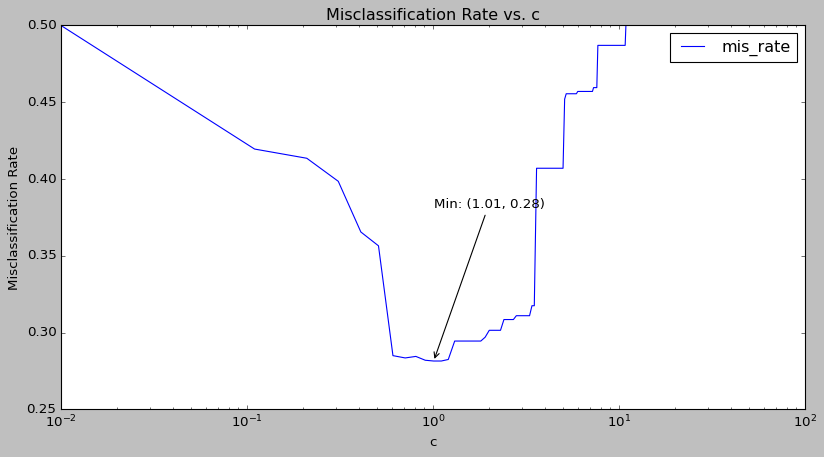

In [ ]:
misclassification = pd.DataFrame(np.arange(0.01, 100.01, 0.1))
misclassification.columns = ['c']
misclassification['mis_rate'] = misclassification['c'].apply(lambda value: np.mean(abs(np.where(merged_data['LR (Ms/Mf)'] > value, 1, 0) - merged_data['is_savannah'])))
misclassification = misclassification.set_index('c')
# Plot with logarithmic x-axis
ax = misclassification.plot.line(logx=True, figsize=(12,6))

# Find minimum misclassification rate and its corresponding x-value
min_mis_rate = misclassification['mis_rate'].min()
min_x_value = misclassification['mis_rate'].idxmin()

# Annotate the plot with the minimum point
ax.annotate(f'Min: ({min_x_value:.2f}, {min_mis_rate:.2f})', xy=(min_x_value, min_mis_rate), xytext=(min_x_value, min_mis_rate + 0.1),
            arrowprops=dict(facecolor='black', arrowstyle='->'))

# Set plot labels and title
plt.xlabel('c')
plt.ylabel('Misclassification Rate')
plt.title('Misclassification Rate vs. c')

# Show plot
plt.show()

- **1b)** Now do the same for 1b.

    Use code block below for this. The output should display the plot(s), and show which $c$ minimizes the misclassification rate.

In [ ]:
# Your code here for 1b.

## **Problem 2:** Digits

Consider the [zipcode data from _Elements of Statistical Learning_ (ESL)](https://hastie.su.domains/ElemStatLearn/data.html). Note there is both a train and test set.

- **2a)** Download the data and try plotting a few examples of the training data as 16 x 16 images to see if you can see the digits visually as expected. [Hint: Use matplotlib's [imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) function.] 

In [ ]:
# Your code here for 2a

- **2b)** Consider the problem of trying to distinguish the digit 2 from the digit 3. Use the training data to learn classifiers, using:
    - logistic regression (un-regularized)
    - K nearest neighbors (K-NNs), with $K=1,3,5,7,15$.
    
    This gives 6 classifiers in total.

    To complete this in Python you will want to use [scikit-learn](https://scikit-learn.org/stable/), and refer to the week 1 notebook for examples.

In [ ]:
# Your code here for 2b

- **2c)** Apply these classifiers to the test data, and plot the misclassification rates for both training data and test data. (Plot the results for K-NN with $K$ on x-axis, and misclassification rate on y-axis, with two different colors for test and training sets. Then put appropriately colored horizontal lines on the same plot---one for test and one for train---indicating the results for logistic regression.)

    Your code in the cell below should output this plot.

In [ ]:
# Your code here for 2c

- **2d)** Repeat the K-NN training as above, but using cross validation (CV) *on the training set* to tune $K$. That is, act like you do not have access to the test data and have to decide what $K$ to use.  How does it do?

    Again, for this problem you will want to use [scikit-learn's methods for cross validation](https://scikit-learn.org/stable/modules/cross_validation.html). 

    Please add code in the cell below, and comment on the results in the space below.

----

Your text answer here: 

----

In [ ]:
# Your code here for 2d

- **2e)** Suppose now that for some reason it is considered worse to misclassify a 2 as a 3 than vice versa. Specifically, suppose you lose 5 points every time you misclassify a 2 as a 3, but 1 point every time you misclassify a 3 as a 2. Modify your logistic regression classifier to take account of this new loss function. Compute the new loss on the test set for both the modified classifier and the original logistic classifier. 

Please add code in the cell below, and provide a brief description / justification of your code in the space below.

----

Your text answer here: 

----

- **2f)** As far as you can, repeat this for the K-NN classifiers (i.e. modify them for the new loss function and compare the loss for modified vs original classifiers). Discuss any challenges you face here. 

Please add code in the cell below, and provide a discussion of any challenges in the space below.

----

Your text answer here: 

----

In [ ]:
# Your code here for 2f

## **Problem 3:** Multiclass digits

Continuing with the zipcode data, now consider distinguishing the digits 1, 2, and 3. 

- For this problem, you will be generalizing the things we discussed in class about binary classification to **multiclass classification**, using multinomial logistic regression.

- Read Section 4.3.5 of [_An Introduction to Statistical Learning with Applications in Python_](https://www.statlearning.com/) on multinomial logistic regression for background.

- You can create a multinomial logistic regression model using scikit-learn as follows:

In [ ]:
from sklearn.linear_model import LogisticRegression
# an (unregularized) multinomial logistic regression model
logreg = LogisticRegression(penalty='none', solver='liblinear', multi_class='multinomial')

- **3a)** Fit a multinomial logistic regression model to the training data of 1s, 2s, and 3s. Then apply it to the test set, and then calculate and plot the **confusion matrix**.

In [ ]:
# Your code here for 3a

- **3b)** Suppose now that for some reason it is considered twice as bad to misclassify a 1 as a 2 than to make any other misclassification. Modify your multinomiallogistic regression classifier to take account of this new loss function. Compute the new loss on the test set for both the modified classifier and the original logistic classifier. 

Please add code in the cell below, and provide justification of your code in the space below, including any derivations you had to do.

----

Your text answer here: 

----

In [ ]:
# Your code here for 3b

- **3c)** Now consider adding $\ell_2$ regularization to your multinomial logistic regression classifier and answer the question: does it improve performance? Devise some experiments to answer this question convincingly. Use the code block below to implement and run those experiments, and to generate plot(s) that convey the results. Use the space below to briefly describe and justify your experiments, to summarize the results, and to speculate on why regularization does or does not help in this setting.

----

Your text answer here: 

----

In [ ]:
# Your code here for 3c